In [ ]:
# Matplotlib 한글 폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

!apt-get -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=font_path, size=9)

plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving kor_tour.xlsx to kor_tour (1).xlsx
User uploaded file "kor_tour.xlsx" with length 13489 bytes


In [ ]:
f = open('2007-00359-이승민-1.txt','w')  # 수험번호와 이름 입력(출력파일 이름)
stdout = sys.stdout
sys.stdout = f

print()
print("*"*20, "파이썬프로그래밍활용 1급 실기과제-1", "*"*20)
print()
print("---수험번호 : 2007-00359      이름 : 이승민    ") # 수험번호와 이름 입력 
print()
print("*"*80)


In [ ]:
import sys, os
import numpy as np
import pandas as pd


# 1. 엑셀 파일 읽기
df = pd.read_excel('kor_tour.xlsx')
print("1. 엑셀 파일 읽기")
print(df.head(3))
print("*"*80)
print()


1. 엑셀 파일 읽기
     국적       관광     상용    공용  유학/연수      기타        계
0  아시아주  1080414  12066  2566  62037  171261  1328344
1    일본   318985   2195   165   2957    5350   329652
2    대만   106682     73    17   1088    1413   109273
********************************************************************************



In [ ]:
# 2. "국적" 컬럼이 대륙 이름인 컬럼을 제거하고 국가만 남기기
ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주']

# 2-1. "국적" 컬럼이 대륙 이름(ignore_list)인 로우 검색하기
df.loc[df['국적'].isin(ignore_list)]

# 2-2. "국적" 컬럼이 대륙 이름인 컬럼을 제거하고 df에 저장하기
df = df.loc[~df['국적'].isin(ignore_list), :] 
print("2. 대륙이름 제거한 데이타 프레임 출력")
# print(df.head(3))
# print("*"*80)
# print()
df

,국적,관광,상용,공용,유학/연수,기타,계
1,일본,318985,2195,165,2957,5350,329652
2,대만,106682,73,17,1088,1413,109273
3,홍콩,64438,74,6,474,966,65958
4,마카오,6258,3,0,49,11,6321
5,태국,24857,50,318,423,7182,32830
6,말레이시아,16892,115,13,690,2810,20520
7,필리핀,13342,144,157,305,27869,41817
8,인도네시아,8337,103,262,814,8694,18210
9,싱가포르,11003,206,8,367,1424,13008
10,미얀마,1373,9,80,212,3849,5523


In [ ]:
# 3. 관광객 수가 가장 많은 국가에서 적은 수 5개의 국적을 출력
df_sort = df.sort_values(by=['관광'],ascending=False)
print("3. 관광객수가 가장 많은 국가 Top 3")
print(df_sort.head(3))
print("*"*80)
print()


In [ ]:
# 4. 국적별 '관광객비율' 컬럼 추가 

df['관광객비율']=((df['관광']/df['계'])*100).round(1)

print("4. 관광객비율 컬럼 추가한 데이타프레임 출력")
print(df.head(3))
print("*"*80)
print()


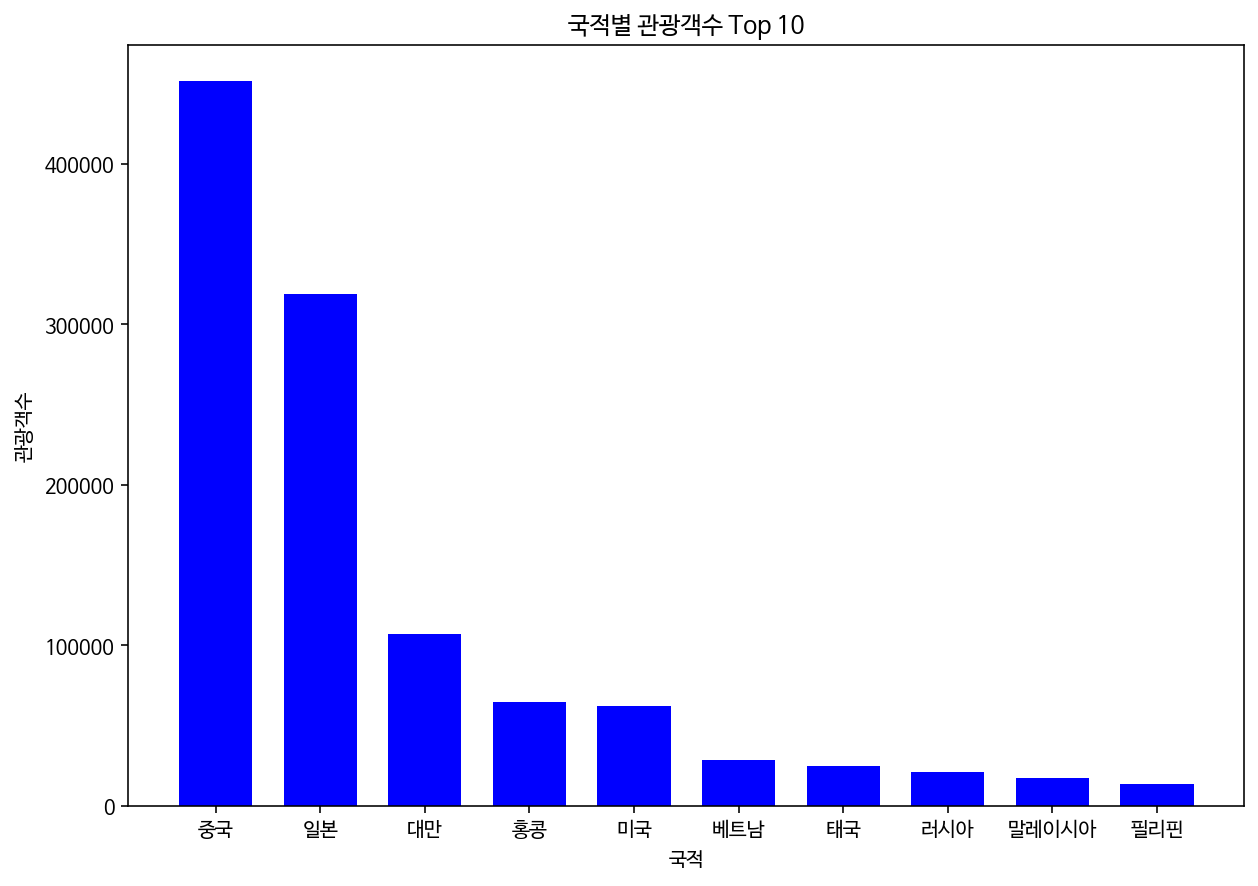

<Figure size 432x288 with 0 Axes>

In [ ]:
# 5. 국적별 관광객 수 그래프 그리기
# 5-1. 관광객 수가 가장 많은 국가에서 적은 수 순으로 5개를 df_top으로 저장
df_top = df.sort_values(by=['관광'],ascending=False)[:10]

# 5-2. 국적별 관광객수 그래프 
plt.figure(figsize=(10,7))
plt.title('국적별 관광객수 Top 10')
plt.xlabel('국적')
plt.ylabel('관광객수')
x = df_top['국적']
y = df_top['관광']
plt.bar(x,y,width=0.7,color='blue')

plt.show()
plt.savefig("2007-00359-이승민-2.png") # 수험번호와 이름 입력.
